In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def perceptron(X, y, alpha, pochs):
    # Initialize weights (including the threshold w0)
    w=np.array([-7, 2, 1])  # Initial weight vector (including w0 as the threshold)
    
    # Add a column of ones to X to handle the bias term (threshold)
    X_bias=np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Store the weights for each epoch
    weights_history=[]
    loss_history=[]

    weights_history.append(w.copy())  # Store weights at this epoch
    
    
    for epoch in range(epochs):
        loss=0
        for i in range(len(X)):
            # Perceptron update rule
            sum = X[i, 0] * w[1] + X[i, 1] * w[2]

            if sum>=w[0]:
                prediction=1
            else:
                prediction=-1

            if prediction!=y[i]:  # Misclassified point
                epsilon=y[i]-prediction
                w = w + alpha*epsilon

                loss+=1
        
        weights_history.append(w.copy())  # Store weights at this epoch
        loss_history.append(loss)
    
    return np.array(weights_history),np.array(loss_history)

In [9]:
# Data matrix X (each row is a feature vector)
X = np.array([[0, -2], [1, 4], [2, 1], [4, -4], [4, -3], [5, 6], [6, 2]])

# Labels vector y (1 or -1)
y = np.array([1, -1, 1, 1, -1, 1, -1])

alpha = 0.1  # Learning rate
epochs = 10  # Number of epochs

weights_history, loss_history = perceptron(X, y, alpha, epochs)

# Print weights and loss for each epoch
print("Weights History:")
print(weights_history)

print("\nLoss History:")
print(loss_history)

Weights History:
[[ -7.    2.    1. ]
 [ -7.6   1.4   0.4]
 [ -8.2   0.8  -0.2]
 [ -8.8   0.2  -0.8]
 [ -9.4  -0.4  -1.4]
 [ -9.8  -0.8  -1.8]
 [-10.   -1.   -2. ]
 [-10.2  -1.2  -2.2]
 [-10.4  -1.4  -2.4]
 [-10.4  -1.4  -2.4]
 [-10.4  -1.4  -2.4]]

Loss History:
[3 3 3 3 4 3 3 3 2 2]


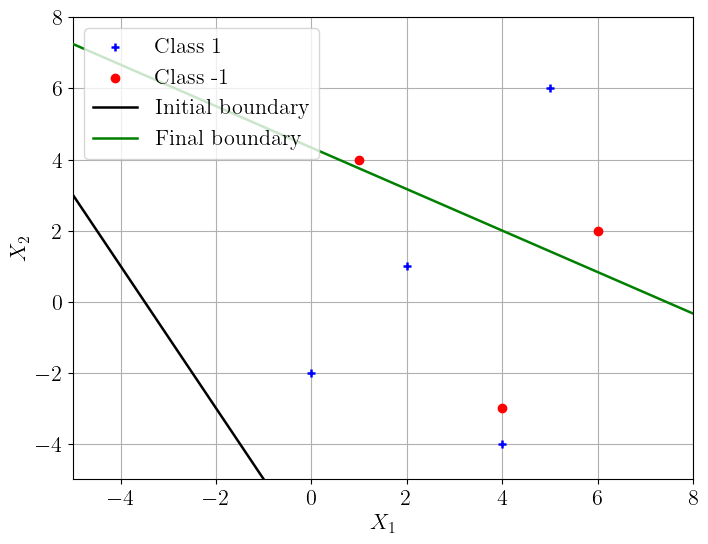

In [10]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['figure.facecolor'] = 'white'

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', color='blue', label='Class 1', zorder=3)
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='o', color='red', label='Class -1', zorder=3)

# Plot initial decision boundary (before training)
x_vals = np.linspace(-8, 8, 100)
y_vals = -(weights_history[0][1] * x_vals - weights_history[0][0]) / weights_history[0][2]
plt.plot(x_vals, y_vals, label='Initial boundary', color='black')

# Plot decision boundary after training (after a few epochs)
y_vals_final = -(weights_history[-1][1] * x_vals - weights_history[-1][0]) / weights_history[-1][2]
plt.plot(x_vals, y_vals_final, label='Final boundary', color='green', zorder=3)

# Line between (1,4) and (4,-3)
# Equation of the line from (1, 4) to (4, -3):
# y = mx + b, where m is the slope and b is the y-intercept
x1, y1 = 1, 4
x2, y2 = 4, -3
m = (y2 - y1) / (x2 - x1)  # Slope
b = y1 - m * x1  # y-intercept

# Redraw grid
plt.grid(True, zorder=0)  # Ensure the grid is in the background
plt.xlim(-5, 8)
plt.ylim(-5, 8)

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc='upper left')

# Show plot
plt.show()


In [11]:

# Data matrix X (each row is a feature vector)
X = np.array([[0, -2], [1, 4], [2, 1], [4, -4], [4, -3], [5, 6], [6, 2]])

def feature_map(X):
    # Apply a simple quadratic feature map: [x1^2, x2^2, sqrt(2) * x1 * x2]
    x1 = X[:, 0]
    x2 = X[:, 1]
    X_mapped = np.column_stack((x1**2, x2**2))
    return X_mapped

X_mapped = feature_map(X)

# Labels vector y (1 or -1)
y = np.array([1, -1, 1, 1, -1, 1, -1])

alpha = 0.1  # Learning rate
epochs = 10  # Number of epochs

weights_history, loss_history = perceptron(X_mapped, y, alpha, epochs)

# Print weights and loss for each epoch
print("Weights History:")
print(weights_history)

print("\nLoss History:")
print(loss_history)

Weights History:
[[-7.   2.   1. ]
 [-7.6  1.4  0.4]
 [-8.2  0.8 -0.2]
 [-8.6  0.4 -0.6]
 [-8.8  0.2 -0.8]
 [-8.8  0.2 -0.8]
 [-8.8  0.2 -0.8]
 [-8.8  0.2 -0.8]
 [-8.8  0.2 -0.8]
 [-8.8  0.2 -0.8]
 [-8.8  0.2 -0.8]]

Loss History:
[3 3 4 3 4 4 4 4 4 4]


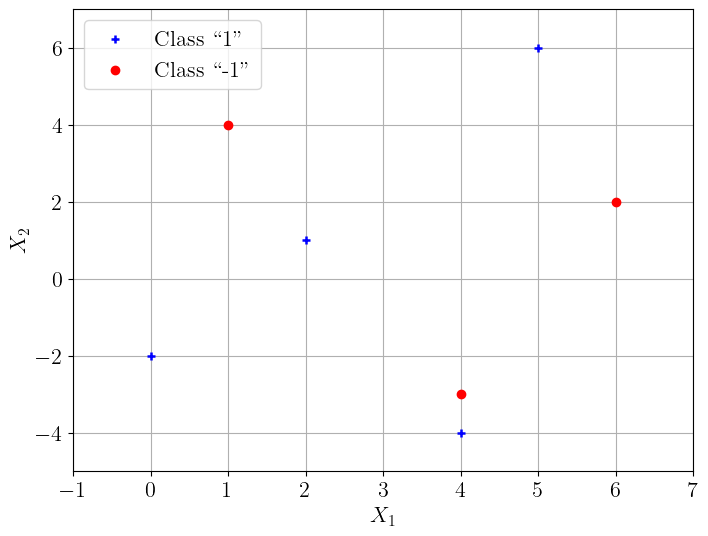

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Example Data
X = np.array([[0, -2], [1, 4], [2, 1], [4, -4], [4, -3], [5, 6], [6, 2]])
y = np.array([1, -1, 1, 1, -1, 1, -1])

# Update matplotlib parameters
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 6,6
plt.rcParams['figure.facecolor'] = 'white'

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', color='blue', label='Class ``1"', zorder=3)
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='o', color='red', label='Class ``-1"', zorder=3)

# Redraw grid
plt.grid(True, zorder=0)  # Ensure the grid is in the background
plt.xlim(-1, 7)
plt.ylim(-5, 7)

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc='upper left')

# Show plot
plt.show()


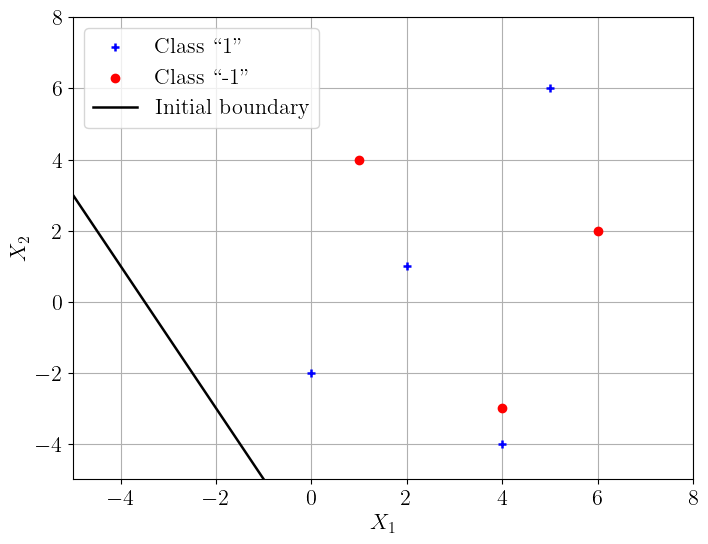

In [13]:
#EXERCISE 1.2

# Example Data
X = np.array([[0, -2], [1, 4], [2, 1], [4, -4], [4, -3], [5, 6], [6, 2]])
y = np.array([1, -1, 1, 1, -1, 1, -1])

# Update matplotlib parameters
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 6,6
plt.rcParams['figure.facecolor'] = 'white'

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', color='blue', label='Class ``1"', zorder=3)
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='o', color='red', label='Class ``-1"', zorder=3)

# Plot initial decision boundary (before training)
x_vals = np.linspace(-8, 8, 100)
y_vals = -(weights_history[0][1] * x_vals - weights_history[0][0]) / weights_history[0][2]
plt.plot(x_vals, y_vals, label='Initial boundary', color='black', zorder=3)

# Redraw grid
plt.grid(True, zorder=0)  # Ensure the grid is in the background
plt.xlim(-5, 8)
plt.ylim(-5, 8)

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc='upper left')

# Show plot
plt.show()